# Продолжительность жизни крыс

В исследовании принимало участие 195 крыс. 106 из них держали на строгой диете, оставшиеся 89 — на диете ad libitum. 

Имеющиеся данные: продолжительность жизни крыс в каждой из групп. Влияет ли диета на продолжительность жизни?

In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import scipy.stats as st
from statsmodels.distributions.empirical_distribution import ECDF
import seaborn as sns
import pandas as pd

In [2]:
rats = pd.read_csv('./rats.txt', delimiter='\t')

In [3]:
rats.head()

,lifespan,diet
0,105,restricted
1,193,restricted
2,211,restricted
3,236,restricted
4,302,restricted


In [4]:
x1 = rats.loc[rats['diet'] == 'restricted']['lifespan'].values
x2 = rats.loc[rats['diet'] == 'ad libitum']['lifespan'].values

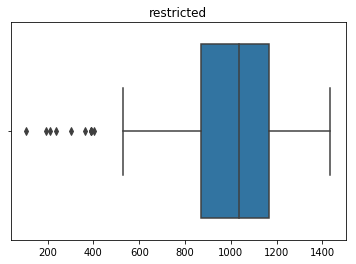

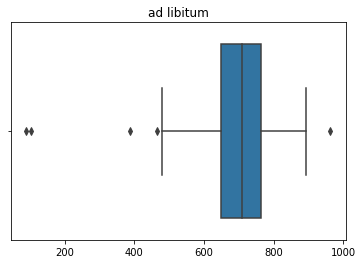

In [5]:
plt.title('restricted')
sns.boxplot(x=x1)
plt.show()
plt.title('ad libitum')
sns.boxplot(x=x2)

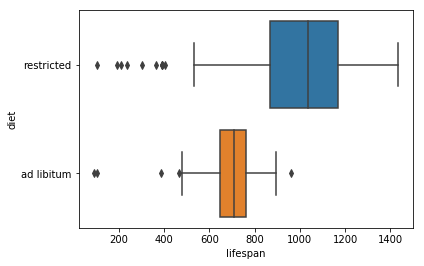

In [6]:
sns.boxplot(x='lifespan', y='diet', data=rats)

Гистограммы распределений

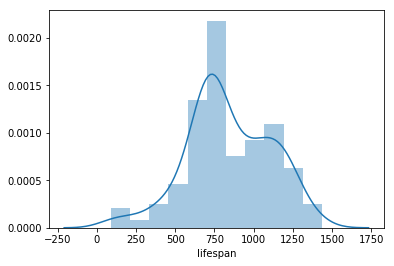

In [12]:
# ваш код
import seaborn as sns
sns.distplot(rats['lifespan'])

# Нормальность
$H_0$: каждая из выборок нормальна

$H_1$: нет

Критерий Шапиро:

In [14]:
# ваш код
st.shapiro(rats['lifespan'])

(0.9769284725189209, 0.0026380273047834635)

Попробуем исключить крыс, проживших меньше 400 дней (например, можно предположить, что смерть раньше этого срока вызывается причинами, не связанными с диетой).

In [20]:
# ваш код
rats_under = rats[rats['lifespan']< 400]

q-q

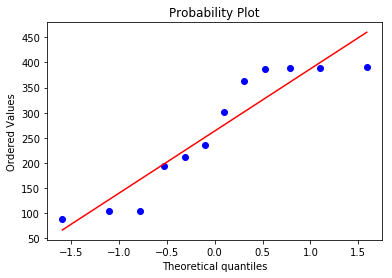

In [22]:
# ваш код
st.probplot(rats_under['lifespan'], plot = plt)
plt.show()

Шапиро:

In [23]:
# ваш код
st.shapiro(rats_under['lifespan'])

(0.8518252372741699, 0.03867106884717941)

Ожидаемые p-value:
```0.049,  0.119```

Усечённые выборки можно считать практически нормальными.

# Сравнение средних
$H_0$: продолжительность жизни крыс не меняется при ограничении диеты.

$H_1$: крысы на строгой диете живут дольше.



In [17]:
from statsmodels.stats.weightstats import ttest_ind
ttest_ind(x1c, x2c, alternative='larger', usevar='unequal')

NameError: name 'x1c' is not defined

In [18]:
ttest_ind(x1c,x2c, alternative='two-sided', usevar='unequal')

NameError: name 'x1c' is not defined

На полных выборках:

In [ ]:
ttest_ind(x1,x2, alternative='larger', usevar='unequal')

In [ ]:
ttest_ind(x1,x2, alternative='two-sided', usevar='unequal')

**Weindruch R., Walford R.L. The Retardation of Aging and Disease by Dietary Restriction. Springfield: Charles C. Thomas, 1988.**